## Proyecto No. 1

Una pequeña demostracion de como podemos crear un modelo de datos y posteriormente montarlo en PostgreSQL

**⚠️Importante⚠️: importacion de librerias**

In [1]:
import psycopg2
import pandas as pd
import numpy as np

### Modelo de datos

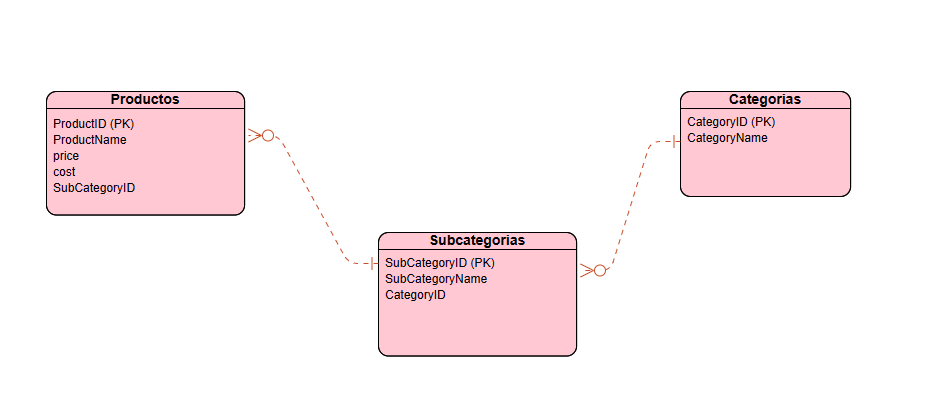

**Creacion de funciones utiles**

In [3]:
def crear_bd():
    #conexion a la bd por defecto
    conexion = psycopg2.connect("host=127.0.0.1 dbname=postgres user=postgres password=root")
    conexion.set_session(autocommit=True)
    cursor = conexion.cursor()

    #cursor.execute("DROP DATABASE empresa")
    #cursor.execute("CREATE DATABASE empresa")

    #cerrar conexion a la bd por defecto
    conexion.close()
    
    #conexion a la bd accounts
    conexion = psycopg2.connect("host=127.0.0.1 dbname=empresa user=postgres password=root")
    cursor = conexion.cursor()
    
    return cursor, conexion

In [4]:
def insertar_registros(df, query):
    for i, row in df.iterrows():
        #print(list(row))
        cursor.execute(query, list(row))
    conexion.commit()

### Datos con los que se van a trabajar

In [7]:
df_productos = pd.read_excel("datos/productos.xlsx")

In [8]:
df_productos.head()

,ProductID,ProductName,Price,Cost,SubCategoryID
0,1,Contoso 512MB MP3 Player E51 Silver,12.99,6.62,101
1,2,Contoso 512MB MP3 Player E51 Blue,12.99,6.62,101
2,3,Contoso 1G MP3 Player E100 White,14.52,7.40,101
3,4,Contoso 2G MP3 Player E200 Silver,21.57,11.00,101
4,5,Contoso 2G MP3 Player E200 Red,21.57,11.00,101


In [9]:
df_productos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ProductID      2517 non-null   int64  
 1   ProductName    2517 non-null   object 
 2   Price          2517 non-null   float64
 3   Cost           2517 non-null   float64
 4   SubCategoryID  2517 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 98.4+ KB


In [13]:
df_subcategoria = pd.read_excel("datos/subcategoria.xlsx")

In [14]:
df_subcategoria.head()

,SubCategoryID,SubCategoryName,CategoryID
0,101,MP4&MP3,1
1,104,Recording Pen,1
2,106,Bluetooth Headphones,1
3,201,Televisions,2
4,202,VCD & DVD,2


In [15]:
df_subcategoria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SubCategoryID    32 non-null     int64 
 1   SubCategoryName  32 non-null     object
 2   CategoryID       32 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 896.0+ bytes


In [10]:
df_categorias = pd.read_excel("datos/categorias.xlsx")

In [11]:
df_categorias.head()

,CategoryID,CategoryName
0,1,Audio
1,8,Home Appliances
2,3,Computers
3,7,Games and Toys
4,6,"Music, Movies and Audio Books"


In [12]:
df_categorias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CategoryID    8 non-null      int64 
 1   CategoryName  8 non-null      object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


### conectarse a la bd y crear tablas

In [16]:
cursor, conexion = crear_bd()

In [17]:
tabla_productos = ("""CREATE TABLE IF NOT EXISTS productos (
ProductID int PRIMARY KEY, 
ProductName VARCHAR, 
price NUMERIC, 
cost NUMERIC,
SubCategoryID int
)""")
cursor.execute(tabla_productos)
conexion.commit()

In [18]:
tabla_subcategorias = ("""CREATE TABLE IF NOT EXISTS subcategorias (
SubCategoryID int PRIMARY KEY, 
SubCategoryName VARCHAR, 
CategoryID int
)""")
cursor.execute(tabla_subcategorias)
conexion.commit()

In [19]:
tabla_categorias = ("""CREATE TABLE IF NOT EXISTS categorias (
CategoryID int PRIMARY KEY, 
CategoryName VARCHAR
)""")
cursor.execute(tabla_categorias)
conexion.commit()

### Insertar registros en tablas

In [20]:
insert_tabla_productos = ("""INSERT INTO productos (
ProductID, 
ProductName, 
price, 
cost,
SubCategoryID
)
VALUES (%s, %s, %s, %s, %s
)""")

In [21]:
insertar_registros(df_productos, insert_tabla_productos)

In [22]:
insert_tabla_subcategorias = ("""INSERT INTO subcategorias (
SubCategoryID, 
SubCategoryName, 
CategoryID
)
VALUES (%s, %s, %s
)""")

In [24]:
insertar_registros(df_subcategoria, insert_tabla_subcategorias)

In [25]:
insert_tabla_categorias = ("""INSERT INTO categorias (
CategoryID,
CategoryName
)
VALUES (%s, %s
)""")

In [26]:
insertar_registros(df_categorias, insert_tabla_categorias)

### Cerramos conexion a la bd

In [28]:
conexion.close()